In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('C:\\Users\\preethi\\Downloads\\Hackathon_Data_May6.csv')
df.head()

,ParentSKU,Site Id,Year,Month,Category Name ID,Unit,Qty,Price,Net Sales calculated,Cash Discount,Amount to Customer,MRP,Pack Size,Pack Unit Id,State,Zone,Master Category,Size,Rank,Date
0,F0033,AHMEDABAD,2017,4,0,NO,1621.0,54,82557,20,93640,80.0,30.0,GM,DL,WEST2,3,30gm,4,2017-04-01
1,F0033,AHMEDABAD,2017,5,0,NO,651.0,51,31473,21,35760,80.0,30.0,GM,DL,WEST2,3,30gm,4,2017-05-01
2,F0033,AHMEDABAD,2017,6,0,NO,457.0,46,19580,12,22293,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-06-01
3,F0033,AHMEDABAD,2017,7,0,NO,1985.0,41,78144,0,78144,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-07-01
4,F0033,AHMEDABAD,2017,8,0,NO,6.0,38,228,0,228,70.0,30.0,GM,DL,WEST2,3,30gm,4,2017-08-01


In [3]:
for col in df.columns:
    print(df[col].value_counts())
    print('_'*25)

F0099    803
F0034    799
F0094    799
F0098    796
F0214    795
F0193    794
F0306    791
F0232    789
F0202    788
F0033    787
F0199    785
F0311    784
F0215    782
F0212    781
F0307    781
F0167    780
F0196    780
F0216    778
F0233    777
F0328    776
F0194    775
F0217    772
F0201    771
F0210    769
F0101    768
F0204    766
F0207    761
F0319    758
F0168    758
F0218    755
F0320    749
F0089    744
F0321    742
F0113    726
F0371    726
F0369    725
F0367    722
F0365    720
F0206    718
F0091    701
F0112    673
F0387    639
F0147    602
F0140    511
T0270    484
F0469    448
F0470    443
F0627    179
F0607    170
F0642     45
F0641     43
F0643     42
Name: ParentSKU, dtype: int64
_________________________
DELMDK        1607
MUMBAI        1600
BANGALORE     1595
MOHALI        1592
PUNE          1589
GHAZIABAD     1587
LUCKNOW       1577
CHENNAI       1576
SECUNDRBAD    1562
AHMEDABAD     1561
KOLKATA2      1557
VIJAYAWADA    1539
INDORE        1529
JAIPUR        1519
KO

Dropping ParentSKU column as it gives no valid information about the product.

In [4]:
df.drop(['ParentSKU'],axis = 1 , inplace = True)

Since 

In [5]:
other_cities = ['HRDFACTORY','GURGAON','KOLKATA']

In [6]:
df['Cash Discount'] = df['Cash Discount'].map(lambda x: 'no discount' if x==0 else 'Discount' )

In [7]:
df['Cash Discount'].value_counts()

no discount    33719
Discount        1231
Name: Cash Discount, dtype: int64

In [8]:
df['Site Id'] = df['Site Id'].map(lambda x: 'other' if x in other_cities else x )

In [9]:
other_packsize = df['Pack Size'].value_counts().iloc[0:13].index

In [10]:
df['Pack Size'] = df['Pack Size'].map(lambda x : 'other' if x in other_packsize else x)

In [11]:
other_packunit = df['Pack Unit Id'].value_counts().iloc[0:5].index
other_packunit

Index(['ML', 'GM', 'KIT', 'Ml', 'Kit'], dtype='object')

In [12]:
df['Pack Unit Id'] = df['Pack Unit Id'].map(lambda x : 'other' if x in other_packunit else x)

In [13]:
df.Zone.unique()

array(['WEST2', 'WEST', 'West', 'SOUTH', 'South', 'EAST', 'NORTH2',
       'NORTH', 'North 1', 'North', 'North 2', 'NORTH1', 'East', 'WEST1',
       'south', 'North1', 'West1'], dtype=object)

In [14]:
x = 'WEST'
y = 'West'
x.lower() == y.lower()

True

In [15]:
df.Zone = df.Zone.map(lambda x : 'west' if x.lower() == 'west' else x)

In [16]:
df.Zone.unique()

array(['WEST2', 'west', 'SOUTH', 'South', 'EAST', 'NORTH2', 'NORTH',
       'North 1', 'North', 'North 2', 'NORTH1', 'East', 'WEST1', 'south',
       'North1', 'West1'], dtype=object)

In [17]:
df.Zone = df.Zone.map(lambda x : 'south' if x.lower() == 'south' else x)

In [18]:
df.Zone = df.Zone.map(lambda x : 'north' if x.lower() == 'north' else x)

In [19]:
df.Zone = df.Zone.map(lambda x : 'east' if x.lower() == 'east' else x)

In [20]:
df.Zone.value_counts()

east       8509
south      7883
north      7218
west       4947
NORTH2     2362
NORTH1     1558
WEST1      1503
WEST2       502
North 1     216
North 2     213
North1       21
West1        18
Name: Zone, dtype: int64

In [21]:
zone_north = ['NORTH2','NORTH1','North 1','North 2','North1']
zone_west = ['West1','WEST1','WEST2']

In [22]:
df['Zone'] = df['Zone'].map(lambda x : 'north' if x in zone_north else ('west' if x in zone_west else x))

In [23]:
df['Zone'].value_counts()

north    11588
east      8509
south     7883
west      6970
Name: Zone, dtype: int64

In [24]:
df['Master Category'] = pd.cut(df['Master Category'],bins = 4)

In [25]:
df['Master Category'].value_counts()

(9.0, 12.0]      18293
(-0.012, 3.0]     7661
(3.0, 6.0]        4908
(6.0, 9.0]        4088
Name: Master Category, dtype: int64

In [26]:
df['Date'][0].split('-')

['2017', '04', '01']

In [27]:
df['Day'] = df['Date'].map(lambda x: x.split('-')[2])

In [28]:
df['Day'].value_counts()

01    34950
Name: Day, dtype: int64

In [29]:
df.drop(['Day','Date'],axis = 1,inplace = True)

In [30]:
df.head(2)

,Site Id,Year,Month,Category Name ID,Unit,Qty,Price,Net Sales calculated,Cash Discount,Amount to Customer,MRP,Pack Size,Pack Unit Id,State,Zone,Master Category,Size,Rank
0,AHMEDABAD,2017,4,0,NO,1621.0,54,82557,Discount,93640,80.0,other,other,DL,west,"(-0.012, 3.0]",30gm,4
1,AHMEDABAD,2017,5,0,NO,651.0,51,31473,Discount,35760,80.0,other,other,DL,west,"(-0.012, 3.0]",30gm,4


In [31]:
df['Category Name ID'].value_counts()

7    21848
6     3274
1     2733
4     2106
0     1586
2     1399
8      902
3      891
5      211
Name: Category Name ID, dtype: int64

In [32]:
df['Unit'].value_counts()

NO     34949
PCS        1
Name: Unit, dtype: int64

In [33]:
df.drop('Unit',axis = 1 , inplace = True)

In [34]:
df.columns

Index(['Site Id', 'Year', 'Month', 'Category Name ID', 'Qty', 'Price',
       'Net Sales calculated', 'Cash Discount', 'Amount to Customer', 'MRP',
       'Pack Size', 'Pack Unit Id', 'State', 'Zone', 'Master Category', 'Size',
       'Rank'],
      dtype='object')

### Catergorical columns

In [49]:
cat_columns = ['Size','Site Id','Year','Month','Zone','Category Name ID','Pack Unit Id','Cash Discount','Master Category','Pack Size','State']

### Numerical columns

In [50]:
num_columns = [x for x in df.columns if x not in cat_columns]

### Value counts of catergorical columns through the bar plot

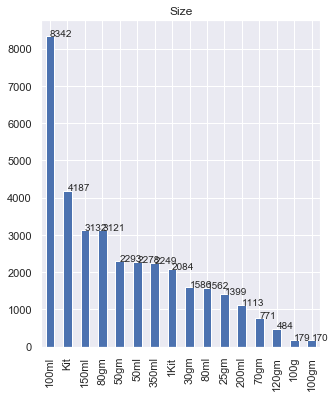

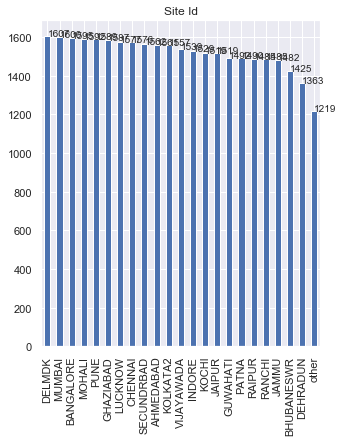

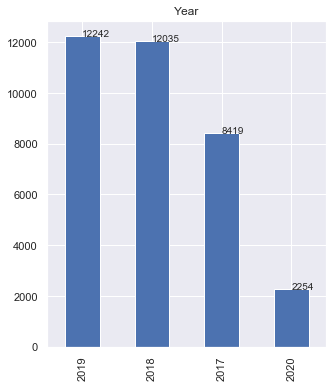

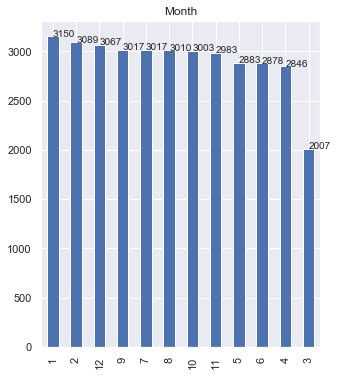

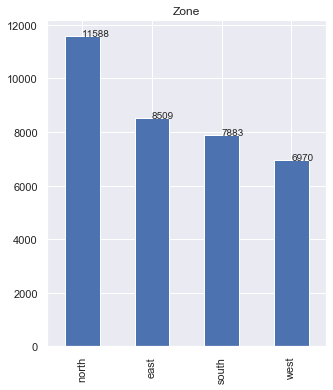

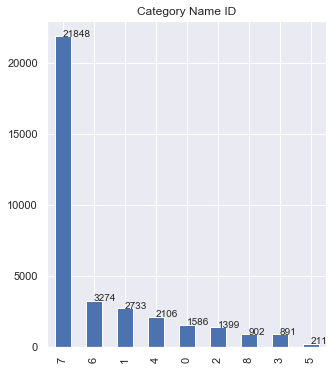

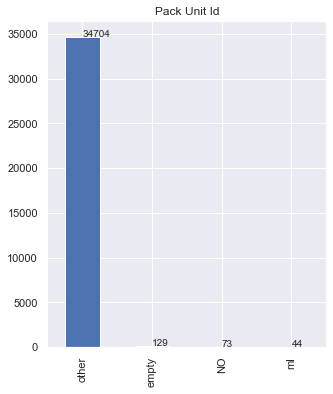

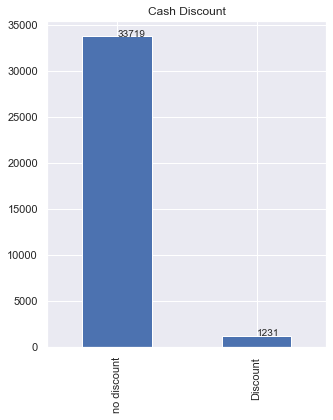

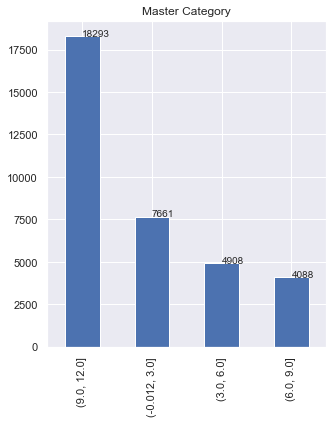

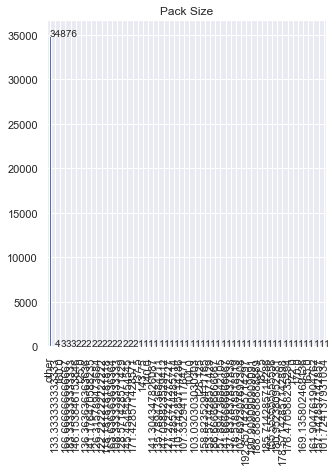

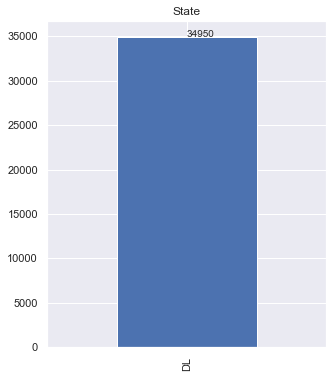

In [37]:
for col in cat_columns:
    df[col].value_counts().plot(kind='bar',figsize= (5,6))
    plt.title(col)
    for num,counts in enumerate(df[col].value_counts()):
        plt.text(x=num,y=counts,s=counts)
    plt.show()

### Value counts of the numerical columns through the bar plot

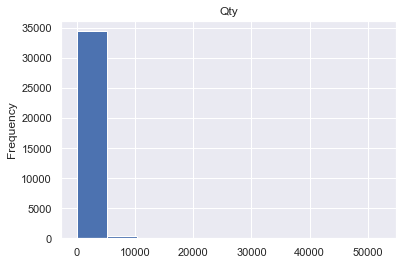

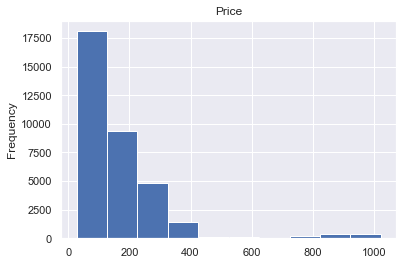

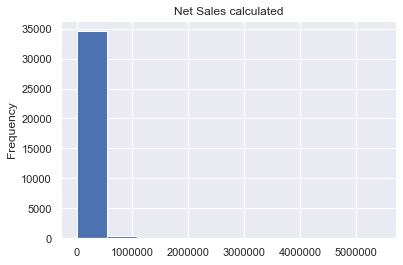

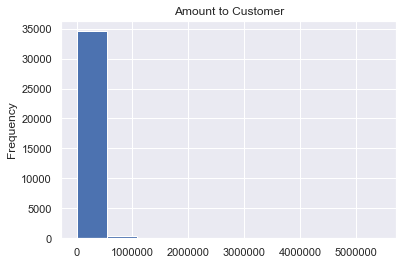

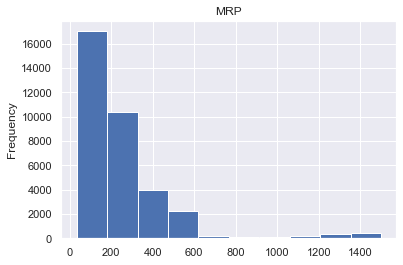

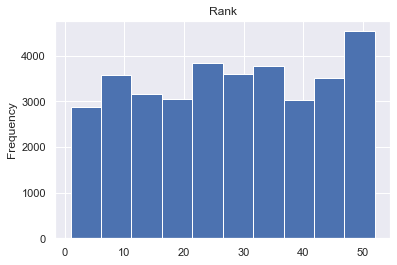

In [38]:
for row in num_columns:
    df[row].plot(kind='hist')
    plt.title(row)
    plt.show()


In [39]:
df = df[df['Qty'] < 3000]

In [40]:
num_columns

['Qty', 'Price', 'Net Sales calculated', 'Amount to Customer', 'MRP', 'Rank']

In [41]:
df = df[df['Net Sales calculated'] < 200000]

In [42]:
df = df[df['Amount to Customer'] <  200000]

In [43]:
cor = df.corr()

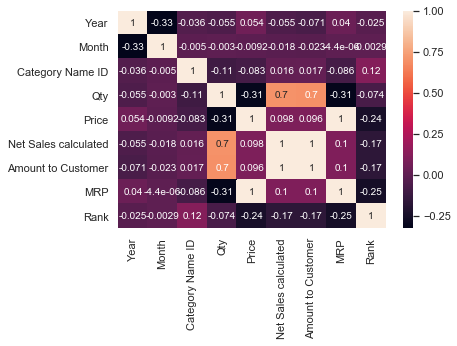

In [44]:
sns.heatmap(cor , annot=True)

1. From the heat map as we can see the correlation between the Qty and Amounnt of customer are same. so its better to drop the Amount of Customer column as it gives no information.
2. Even MRP and Price are correlated to each other with the same amount. So, we'll drop MRP column.

In [45]:
df.head()

,Site Id,Year,Month,Category Name ID,Qty,Price,Net Sales calculated,Cash Discount,Amount to Customer,MRP,Pack Size,Pack Unit Id,State,Zone,Master Category,Size,Rank
0,AHMEDABAD,2017,4,0,1621.0,54,82557,Discount,93640,80.0,other,other,DL,west,"(-0.012, 3.0]",30gm,4
1,AHMEDABAD,2017,5,0,651.0,51,31473,Discount,35760,80.0,other,other,DL,west,"(-0.012, 3.0]",30gm,4
2,AHMEDABAD,2017,6,0,457.0,46,19580,Discount,22293,70.0,other,other,DL,west,"(-0.012, 3.0]",30gm,4
3,AHMEDABAD,2017,7,0,1985.0,41,78144,no discount,78144,70.0,other,other,DL,west,"(-0.012, 3.0]",30gm,4
4,AHMEDABAD,2017,8,0,6.0,38,228,no discount,228,70.0,other,other,DL,west,"(-0.012, 3.0]",30gm,4


In [46]:
df.drop('Amount to Customer',axis = 1,inplace = True)

In [47]:
df.drop('MRP',axis = 1,inplace = True)

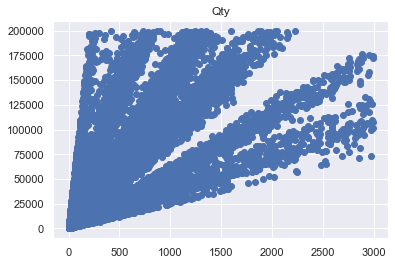

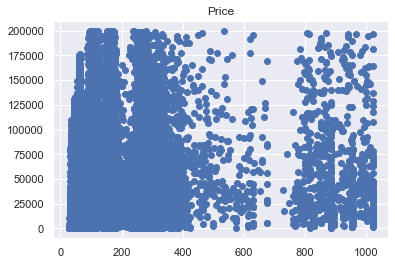

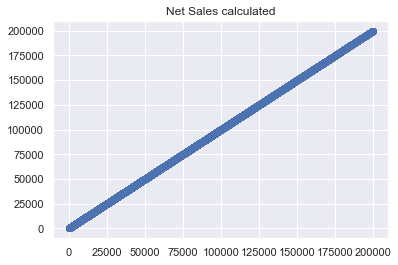

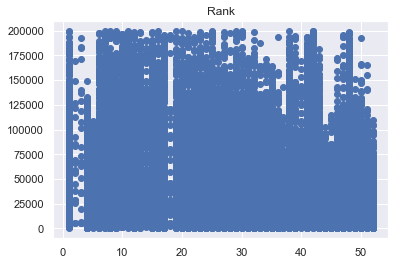

In [51]:
for col in num_columns:
    plt.scatter(x=df[col], y = df['Net Sales calculated'])
    plt.title(col)
    plt.show()

In [52]:
net_scale = pd.cut(df['Net Sales calculated'] ,[0,50000,100000,150000,200000])

In [56]:
df['Net scale'] = net_scale

In [57]:
df['Net scale'].value_counts().keys()[0]

Interval(0, 50000, closed='right')

In [58]:
df.head()

,Site Id,Year,Month,Category Name ID,Qty,Price,Net Sales calculated,Cash Discount,Pack Size,Pack Unit Id,State,Zone,Master Category,Size,Rank,Net scale
0,AHMEDABAD,2017,4,0,1621.0,54,82557,Discount,other,other,DL,west,"(-0.012, 3.0]",30gm,4,"(50000, 100000]"
1,AHMEDABAD,2017,5,0,651.0,51,31473,Discount,other,other,DL,west,"(-0.012, 3.0]",30gm,4,"(0, 50000]"
2,AHMEDABAD,2017,6,0,457.0,46,19580,Discount,other,other,DL,west,"(-0.012, 3.0]",30gm,4,"(0, 50000]"
3,AHMEDABAD,2017,7,0,1985.0,41,78144,no discount,other,other,DL,west,"(-0.012, 3.0]",30gm,4,"(50000, 100000]"
4,AHMEDABAD,2017,8,0,6.0,38,228,no discount,other,other,DL,west,"(-0.012, 3.0]",30gm,4,"(0, 50000]"


In [59]:
def net_scale(x):
    if x == df['Net scale'].value_counts().keys()[0]:
        x = '0-50K'
        return x
    elif x == df['Net scale'].value_counts().keys()[1]:
        x = '50K-100K'
        return x
    elif x == df['Net scale'].value_counts().keys()[2]:
        x = '100K-150K'
        return x
    elif x == df['Net scale'].value_counts().keys()[3]:
        x = '150K-200K'
        return x
    

In [60]:
df['Net scale'] = df['Net scale'].map(net_scale)

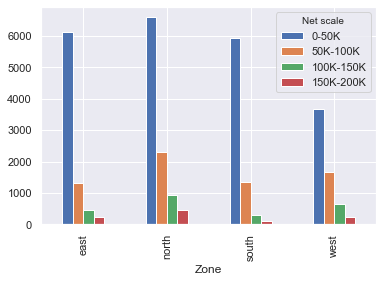

In [61]:
df.groupby(['Zone','Net scale'])[['Net scale']].size().unstack().plot(kind='bar')

1. From the above plot we can say that on an aggregate in the north region of delhi more products are being sold and which is resulting in more sale.
2. And in the west region of delhi less number of product are being sold and which is resulting in loss and less number of sale frequency. 

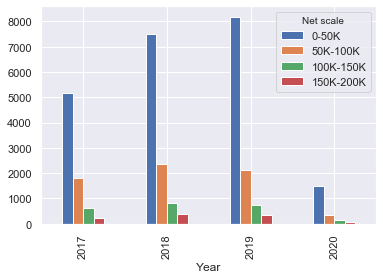

In [66]:
df.groupby(['Year','Net scale'])[['Net scale']].size().unstack().plot(kind='bar')

1. In this plot we conclude that in the year 2019 and 2018 , The company has landed up for a huge profit. So, this could be due to many reasons, one can be promoting the product which is in demand of the market. 
2. In the year 2020 , we can see the market has drop down , that could be due to not so satisfacctory product being sold. Or might be due to the reason of not being aware of a certain product.

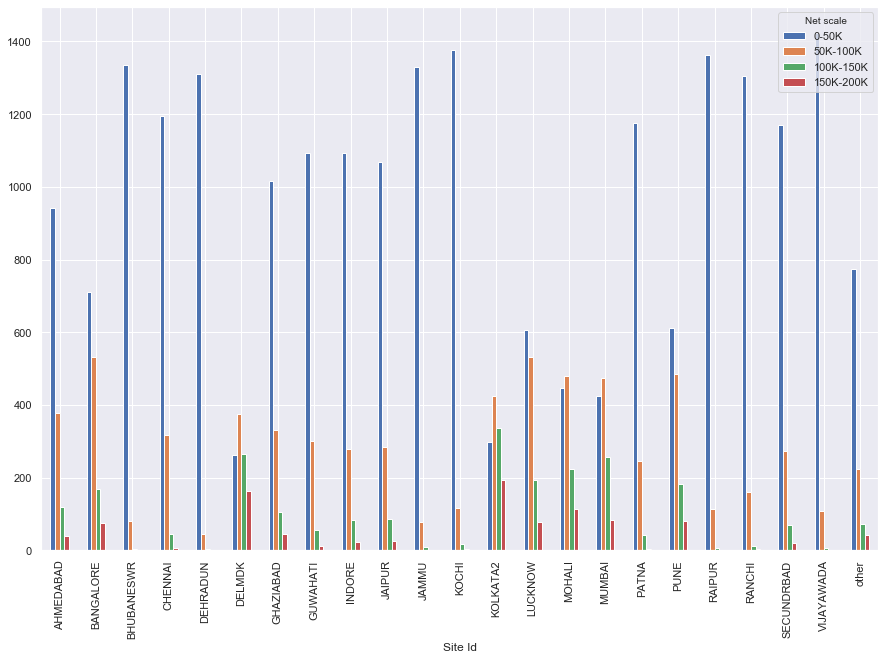

In [75]:
df.groupby(['Site Id','Net scale'])[['Net scale']].size().unstack().plot(kind='bar',figsize=(15,10))

1. From the above plot we can say that the production of the products billing grom [0-200K] are more from Kochi,Raipur,Vijaywada and Bhubaneshwar.
2. The production rates are less in Kolkata2, Delmdk,mohali and mumbai.

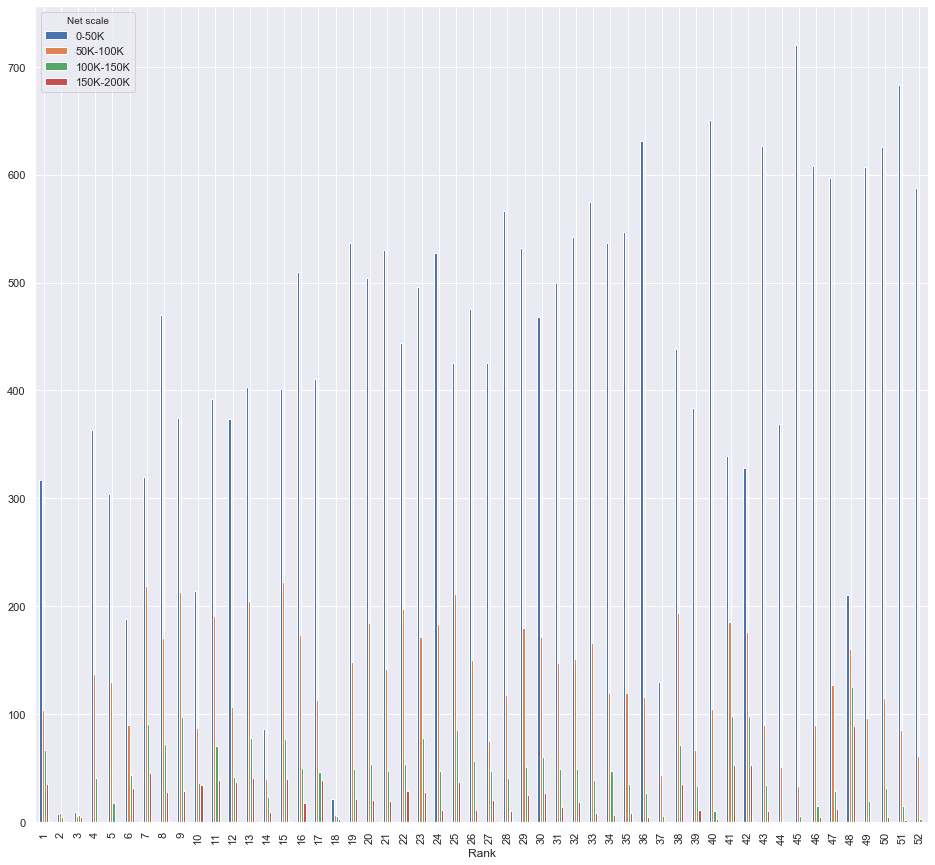

In [77]:
df.groupby(['Rank','Net scale'])[['Net scale']].size().unstack().plot(kind='bar',figsize=(16,15))

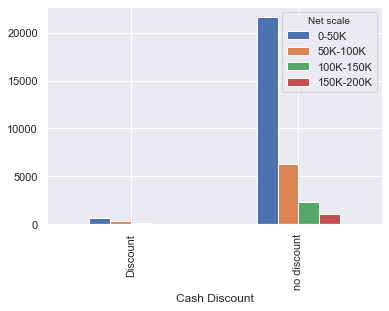

In [79]:
df.groupby(['Cash Discount','Net scale'])[['Net scale']].size().unstack().plot(kind='bar')

1. In the above plot we can say that, discounts are only applied to some few products specially in the range of [0-50K] and [50K-100K]
2. Also, there is a large amount of products where the discount is not applied. 

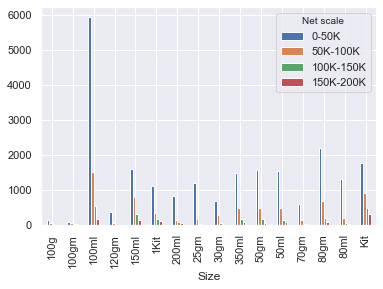

In [80]:
df.groupby(['Size','Net scale'])[['Net scale']].size().unstack().plot(kind='bar')

This plot depicts that 100mL products are more saled. Than the rest of the products.

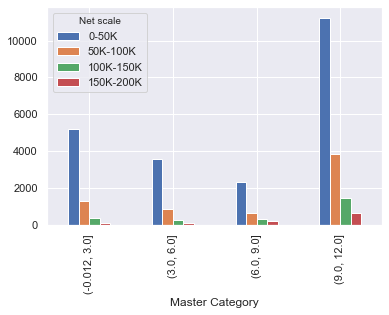

In [83]:
df.groupby(['Master Category','Net scale'])[['Net scale']].size().unstack().plot(kind='bar')

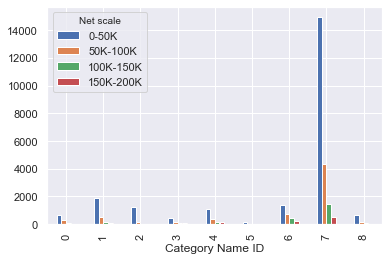

In [85]:
df.groupby(['Category Name ID','Net scale'])[['Net scale']].size().unstack().plot(kind='bar')

The product ID no. 7 is more in demand and are more being sold resulting in more sale and more profit to the company. 
While product ID no. 5 is not so in demand might be because of the price or less awareness about the product etc.

### How the sales can be improved.

Limiting the opportunity. The idea of limited-time-offer is common in retail, but creating a sense of scarcity is a tactic which can be used in inductry. ex: An offer good for this month or availability.

### How the marketing can be improved.

Outbound marketing. Outbound marketing represents traditional 'push' marketing. This includes television advertisement, direct mail flyers etc.